<h2 align='center'> MÔN HỌC: KỸ NGHỆ TRI THỨC VÀ HỌC MÁY (7080510) </h2>

---
* Giảng viên: Đặng Văn Nam
* Email: dangvannam@humg.edu.n

---
* Họ tên sinh viên:Trịnh Văn Rinh
* Mã sinh viên:1821050766
* Lớp/Nhóm môn học:02
* Email:trinhrinh55@gmail.com

---

### CHƯƠNG 3: HỌC CÓ GIÁM SÁT (SUPERVISED LEARNING) - PHẦN 04
---
Một thuật toán học máy được gọi là học có giám sát (supervised learning) nếu việc xây dựng mô hình dự đoán mối quan hệ giữa đầu vào và đầu ra được thực hiện dựa trên các cặp (đầu vào - input, đầu ra - label) đã biết trong tập huấn luyện. Đây là nhóm thuật toán phổ biến nhất trong các thuật toán machine learning.

Tập dữ liệu học (Training data) bao gồm các quan sát (Examples, Observations), mà mỗi quan sát được gắn kèm với một giá trị đầu ra mong muốn (Label)
<img src='pic/label.png' width='600px'>

Học có giám sát bao gồm 2 loại:
* Phân loại (Classification): Nếu nhãn (y – Target) thuộc tập rời rạc và hữu hạn
* Hồi quy (Regression): Nếu nhãn (y – Target) là biến liên tục (các số thực) ví dụ như dự báo nhiệt độ, giá nhà, mức tiêu thụ điện năng…

<img src='pic/type.png' width='400px' heith='300px'>

## THỰC HÀNH 8
---
### Yêu cầu 1: 
Sinh viên tìm hiểu về tập dữ liệu mẫu Diabetes Dataset của Sklearn (xác định các features đầu vào (input) và label đầu ra (target))


In [132]:
#{Sinh viên viết code ở đây!}
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes

In [133]:
diabetes = load_diabetes()
df_diabetes = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
print("Các features đầu vào (input):", df_diabetes.columns.tolist())

Các features đầu vào (input): ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [134]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [135]:
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


**Yêu cầu 2:**
---
* Trong tập dữ liệu Diabetes xác định thuộc tính có ảnh hưởng lớn nhất (hệ số tương quan cao nhất) tới thuộc tính target.
* Tách tập dữ liệu thành 2 phần Train – Test với tỷ lệ 75%-25%

<AxesSubplot:>

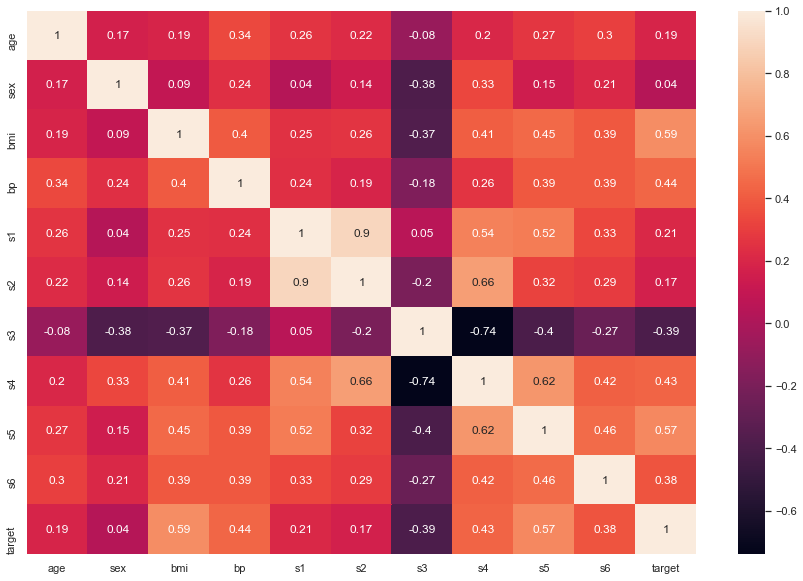

In [136]:
#{Sinh viên viết code ở đây!}
import warnings
import seaborn as sns
df_diabetes["target"] = diabetes.target
correlation_matrix = df_diabetes.corr().round(2)
sns.set(rc={"figure.figsize":(15,10)})
sns.heatmap(data=correlation_matrix, annot=True)



In [137]:
from sklearn.model_selection import train_test_split
X_diabetes = df_diabetes.bmi.values.reshape(442,1)
y_diabetes = df_diabetes.target
X_diabetes_train, X_diabetes_test, y_diabetes_train, y_diabetes_test = train_test_split(X_diabetes, y_diabetes, test_size=0.25, random_state=42)
X_diabetes_train.shape

(331, 1)

In [138]:
X_diabetes_test.shape

(111, 1)

### Yêu cầu 3:
---
* 1) Xây dựng mô hình hồi quy tuyến tính đơn giản (Simple Linear Regression) với thuộc tính có ảnh hưởng cao nhất tới thuộc tính Target. Xác định sai số RMSE và R2 trên tập Train và Test.
* 2) Xây dựng mô hình hồi quy tuyến tính với tất các thuộc tính đầu vào (input). Xác định sai số RMSE và R2  trên tập Train và Test.


# 1

In [139]:
#{Sinh viên viết code ở đây!}
#Sử dụng model hồi quy tuyến tính cho bài toán 
from sklearn.linear_model import LinearRegression

#khai báo sử dụng model với các tham số mặc định
model_linear = LinearRegression()

#Các tham số của mô hình:
model_linear.get_params()



{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [140]:
#Huấn luyện model:
model_linear.fit(X_diabetes_train, y_diabetes_train)

LinearRegression()

In [141]:
#Lấy các hệ số của phương trình:
#hệ số w1:
w1 = model_linear.coef_
w1

array([975.27698313])

In [142]:
#Hệ số w0 (bias):
w0 = model_linear.intercept_
w0

152.0765329689407

In [143]:
#Kiểm tra trên tập Test:
X_diabetes_test = X_diabetes_test.reshape(-1, 1)

y_pred = model_linear.predict(X_diabetes_test)
y_pred.reshape(1,-1)

array([[146.02400874, 188.07062105, 148.12633936, 202.78693536,
        132.35885974, 128.15419851, 318.41511922, 196.47994352,
         64.03311473, 167.0473149 , 119.74487605,  95.56807397,
         92.41457804, 165.99614959,  97.67040458, 157.58682713,
        221.7079109 , 238.52655583, 179.66129859, 209.09392721,
        190.17295167, 110.28438828, 103.97739643, 174.40547205,
        195.42877821, 165.99614959, 210.14509252, 134.46119036,
         79.80059435, 131.30769443, 242.73121706, 115.54021482,
        165.99614959, 146.02400874, 191.22411698, 228.01490275,
        121.84720666, 119.74487605, 121.84720666,  95.56807397,
         84.00525558, 122.89837197, 130.25652913, 119.74487605,
        108.18205766, 117.64254543, 116.59138012, 102.92623112,
         69.28894127, 153.3821659 , 209.09392721,  84.00525558,
        169.14964551, 112.38671889, 134.46119036, 215.40091906,
        107.13089235, 212.24742313, 134.46119036,  98.72156989,
        181.76362921, 192.27528228, 204.

In [144]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, max_error

#Đánh giá độ chính xác trên tập Train:
y_train_predict = model_linear.predict(X_diabetes_train)
y_train_predict = y_train_predict.reshape(-1,1)

#Tính các sai số:
rmse_train = (np.sqrt(mean_squared_error(y_diabetes_train, y_train_predict)))
r2_train = r2_score(y_diabetes_train, y_train_predict)

print("Độ chính xác của mô hình trên tập huấn luyện:")
print("--------------------------------------------")
print('1.Sai số RMSE = ',rmse_train)
print('2.Sai số R2   = ',r2_train)

Độ chính xác của mô hình trên tập huấn luyện:
--------------------------------------------
1.Sai số RMSE =  62.69760374633988
2.Sai số R2   =  0.34967185121455047


In [145]:
# Đánh giá độ chính xác trên tập TEST:
y_diabetes_test = y_diabetes_test.values.reshape(-1,1)

#Tính các sai số:
rmse_test = (np.sqrt(mean_squared_error(y_diabetes_test, y_pred)))
r2_test = r2_score(y_diabetes_test, y_pred)

print("Độ chính xác của mô hình trên Kiểm thử:")
print("--------------------------------------------")
print('1.Sai số RMSE = ',rmse_test)
print('2.Sai số R2   = ',r2_test)

Độ chính xác của mô hình trên Kiểm thử:
--------------------------------------------
1.Sai số RMSE =  61.44605114652022
2.Sai số R2   =  0.3172099449537781


# 2)

In [146]:
from sklearn.model_selection import train_test_split
X_diabetes_train, X_diabetes_test, y_diabetes_train, y_diabetes_test = train_test_split(X_diabetes, 
                                                    y_diabetes, 
                                                    test_size=0.2, 
                                                    random_state=50)
print("1. Kích thước tập Training: %d" %len(y_diabetes_train))
print("2. Kích thước tập Test    : %d" %len(y_diabetes_test))

1. Kích thước tập Training: 353
2. Kích thước tập Test    : 89


In [147]:
#Sử dụng model huấn luyện được trên tập Train để dự đoán trên tập Test
y_pred_all = model_all.predict(X_diabetes_test)
y_pred_all = np.round(y_pred_all,1)

In [164]:
#Sử dụng model hồi quy tuyến tính cho bài toán 
from sklearn.linear_model import LinearRegression
#Khai báo model với các tham số mặc định:
model_all = LinearRegression(fit_intercept=False,normalize=True)

#Huấn luyện model:
model_all.fit(X_diabetes_train, y_diabetes_train)

LinearRegression(fit_intercept=False, normalize=True)

In [165]:
rmse_all = (np.sqrt(mean_squared_error(y_diabetes_test, y_pred_all)))
r2_all = r2_score(y_diabetes_test, y_pred_all)

print('MÔ HÌNH HỒI QUY TUYẾN TÍNH SỬ DỤNG THAM SỐ VỚI TẤT CẢ THUỘC TÍNH:')
print("Độ chính xác của mô hình trên tập TEST:")
print("--------------------------------------------")
print('1.Sai số RMSE = ',rmse_all)
print('2.Sai số R2   = ',r2_all)

MÔ HÌNH HỒI QUY TUYẾN TÍNH SỬ DỤNG THAM SỐ VỚI TẤT CẢ THUỘC TÍNH:
Độ chính xác của mô hình trên tập TEST:
--------------------------------------------
1.Sai số RMSE =  157.57955793392645
2.Sai số R2   =  -3.464226055697176


## THỰC HÀNH 3.4
---
Yêu cầu 1, 2 giống với bài thực hành 3.3

Yêu cầu 3:
1. Xây dựng mô hình KNN cho bài toán hồi quy (Simple Linear Regression) với thuộc tính có ảnh hưởng cao nhất tới thuộc tính Target. Xác định sai số RMSE và R2 trên tập Train và Test.
2. Xây dựng mô hình KNN cho bài toán hồi quy với tất các thuộc tính đầu vào (input). Xác định sai số RMSE và R2  trên tập Train và Test.

In [166]:
#{Sinh viên viết code ở đây}
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes


* 1) Xây dựng mô hình hồi quy tuyến tính đơn giản (Simple Linear Regression) với thuộc tính có ảnh hưởng cao nhất tới thuộc tính Target. Xác định sai số RMSE và R2 trên tập Train và Test.
* 2) Xây dựng mô hình hồi quy tuyến tính với tất các thuộc tính đầu vào (input). Xác định sai số RMSE và R2  trên tập Train và Test.

In [167]:
diabetes = load_diabetes()
df_diabetes = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
print("Các features đầu vào (input):", df_diabetes.columns.tolist())

Các features đầu vào (input): ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [168]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [169]:
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


**Yêu cầu 2:**
---
* Trong tập dữ liệu Diabetes xác định thuộc tính có ảnh hưởng lớn nhất (hệ số tương quan cao nhất) tới thuộc tính target.
* Tách tập dữ liệu thành 2 phần Train – Test với tỷ lệ 75%-25%

<AxesSubplot:>

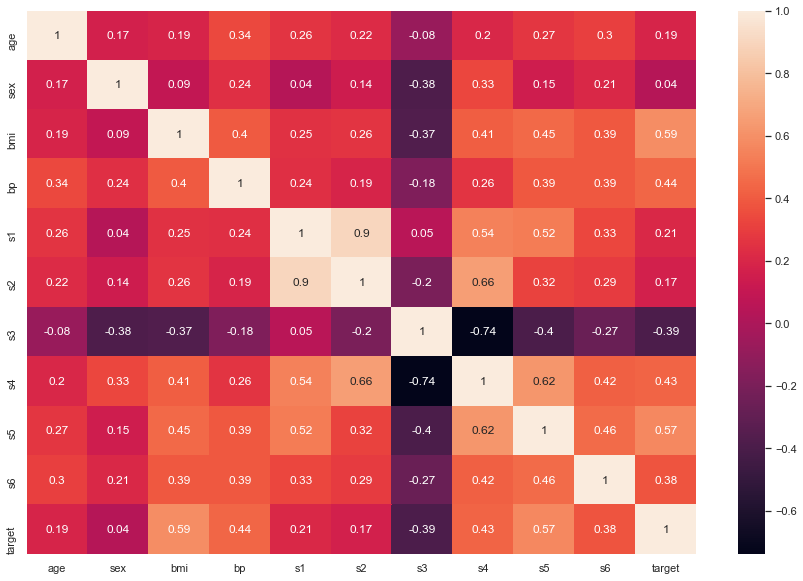

In [170]:
#{Sinh viên viết code ở đây!}
import warnings
import seaborn as sns
df_diabetes["target"] = diabetes.target
correlation_matrix = df_diabetes.corr().round(2)
sns.set(rc={"figure.figsize":(15,10)})
sns.heatmap(data=correlation_matrix, annot=True)

In [171]:
from sklearn.model_selection import train_test_split
X_diabetes = df_diabetes.bmi.values.reshape(442,1)
y_diabetes = df_diabetes.target
X_diabetes_train, X_diabetes_test, y_diabetes_train, y_diabetes_test = train_test_split(X_diabetes, y_diabetes, test_size=0.25, random_state=42)
X_diabetes_train.shape

(331, 1)

# Yêu cầu 3:
1. Xây dựng mô hình KNN cho bài toán hồi quy (Simple Linear Regression) với thuộc tính có ảnh hưởng cao nhất tới thuộc tính Target. Xác định sai số RMSE và R2 trên tập Train và Test.
2. Xây dựng mô hình KNN cho bài toán hồi quy với tất các thuộc tính đầu vào (input). Xác định sai số RMSE và R2  trên tập Train và Test.

# 1

In [172]:
from sklearn.model_selection import train_test_split
X_diabetes_train, X_diabetes_test, y_diabetes_train, y_diabetes_test = train_test_split(X_diabetes, 
                                                    y_diabetes, 
                                                    test_size=0.2, 
                                                    random_state=50)
print("1. Kích thước tập Training: %d" %len(y_diabetes_train))
print("2. Kích thước tập Test    : %d" %len(y_diabetes_test))

1. Kích thước tập Training: 353
2. Kích thước tập Test    : 89


In [173]:
#Khai báo sử dụng thuật toán hồi quy KNN
from sklearn.neighbors import KNeighborsRegressor

#Trường hợp với n = 8
knn_reg = KNeighborsRegressor(n_neighbors=8)

#Huấn luyện model
knn_reg.fit(X_diabetes_train,y_diabetes_train)
print(knn_reg)

KNeighborsRegressor(n_neighbors=8)


In [174]:
from sklearn.metrics import mean_squared_error, r2_score
# model evaluation for training set
y_train_predict = knn_reg.predict(X_diabetes_train)
y_train_predict = y_train_predict.reshape(-1,1)

rmse = (np.sqrt(mean_squared_error(y_diabetes_train, y_train_predict)))
r2 = r2_score(y_diabetes_train, y_train_predict)

print("Độ chính xác của mô hình trên tập huấn luyện:")
print("--------------------------------------------")
print('Sai số RMSE {}'.format(rmse))
print('Sai số R2   {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = knn_reg.predict(X_diabetes_test)
y_test_predict = y_test_predict.reshape(-1,1)

y_test = y_test.reshape(-1,1)
rmse = (np.sqrt(mean_squared_error(y_diabetes_test, y_test_predict)))
r2 = r2_score(y_diabetes_test, y_test_predict)

print("Độ chính xác của mô hình trên tập kiểm thử:")
print("-------------------------------------------")
print('Sai số RMSE {}'.format(rmse))
print('Sai số R2   {}'.format(r2))

Độ chính xác của mô hình trên tập huấn luyện:
--------------------------------------------
Sai số RMSE 58.57283425088207
Sai số R2   0.4292897937996555


Độ chính xác của mô hình trên tập kiểm thử:
-------------------------------------------
Sai số RMSE 61.89955250015222
Sai số R2   0.3111551101492698


# 2

In [175]:
#Sử dụng thuật toán hồi quy KNN với k=3
from sklearn.neighbors import KNeighborsRegressor
knn_reg_all = KNeighborsRegressor(n_neighbors = 3)

#Huấn luyện
knn_reg_all.fit(X_diabetes_train,y_diabetes_train)

KNeighborsRegressor(n_neighbors=3)

In [176]:
from sklearn.metrics import mean_squared_error, r2_score
# model evaluation for training set
y_train_predict = knn_reg_all.predict(X_diabetes_train)
y_train_predict = y_train_predict.reshape(-1,1)

rmse = (np.sqrt(mean_squared_error(y_diabetes_train, y_train_predict)))
r2 = r2_score(y_diabetes_train, y_train_predict)

print("Độ chính xác của mô hình trên tập huấn luyện:")
print("--------------------------------------------")
print('Sai số RMSE {}'.format(rmse))
print('Sai số R2   {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = knn_reg_all.predict(X_diabetes_test)
y_test_predict = y_test_predict.reshape(-1,1)

y_test = y_test.reshape(-1,1)
rmse = (np.sqrt(mean_squared_error(y_diabetes_test, y_test_predict)))
r2 = r2_score(y_diabetes_test, y_test_predict)

print("Độ chính xác của mô hình trên tập kiểm thử:")
print("-------------------------------------------")
print('Sai số RMSE {}'.format(rmse))
print('Sai số R2   {}'.format(r2))

Độ chính xác của mô hình trên tập huấn luyện:
--------------------------------------------
Sai số RMSE 54.40522538272906
Sai số R2   0.5076154830968129


Độ chính xác của mô hình trên tập kiểm thử:
-------------------------------------------
Sai số RMSE 65.51583468335863
Sai số R2   0.2283169180072675
